In [ ]:
# If needed, install required libraries
!pip install imbalanced-learn scikit-learn seaborn matplotlib
!pip install scikit-learn --upgrade # Upgrade scikit-learn

# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             precision_score, recall_score, f1_score,
                             roc_curve, auc, precision_recall_curve)
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder



In [ ]:
# Load data from the local Colab path
data = pd.read_csv("/content/Fraud.csv")

# View basic information about the data
print(data.head())
print(data.shape)
print(data.isna().sum())  # Check for missing values
print(data.duplicated().sum())  # Check for duplicates
data.info()  # Display info about data types and null values


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  
(395819, 11)
step              0
type              0
amount            1
nameOrig          1
oldbalanceOr

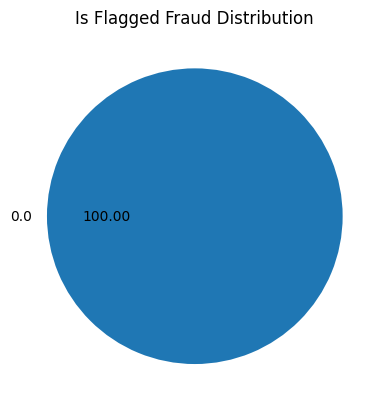

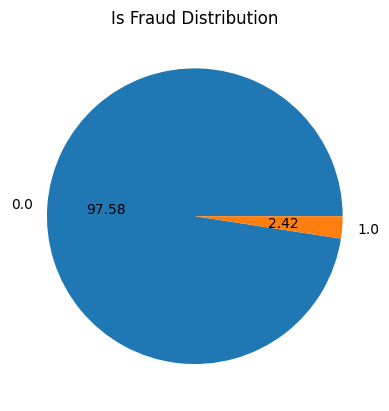

Fraud Counts:
 isFraud
0.0    395614
1.0       204
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 8417 entries, 0 to 377151
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            8417 non-null   int64  
 1   type            8417 non-null   object 
 2   amount          8417 non-null   float64
 3   nameOrig        8417 non-null   object 
 4   oldbalanceOrg   8417 non-null   float64
 5   newbalanceOrig  8417 non-null   float64
 6   nameDest        8417 non-null   object 
 7   oldbalanceDest  8417 non-null   float64
 8   newbalanceDest  8417 non-null   float64
 9   isFraud         8417 non-null   float64
 10  isFlaggedFraud  8417 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 789.1+ KB
None


In [ ]:
# Balancing the dataset
data1 = data[data["isFraud"] == 1]
data0 = data[data["isFraud"] == 0][:8213]  # Sampling to balance
new_data = pd.concat([data0, data1], axis=0)

# Visualize the "isFlaggedFraud" distribution
plt.pie(new_data["isFlaggedFraud"].value_counts(), labels=new_data["isFlaggedFraud"].unique(), autopct="%.2f")
plt.title("Is Flagged Fraud Distribution")
plt.show()

# Visualize the "isFraud" distribution
plt.pie(new_data["isFraud"].value_counts(), labels=new_data["isFraud"].unique(), autopct="%.2f")
plt.title("Is Fraud Distribution")
plt.show()

print("Fraud Counts:\n", data["isFraud"].value_counts())
print(new_data.info())


In [ ]:
# Drop unnecessary columns
new_data = new_data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']]

# Encode categorical 'type' feature
lb = LabelEncoder()
new_data["type"] = lb.fit_transform(new_data["type"])

# Define features (X) and target (y)
X = new_data.iloc[:, :-1]
y = new_data.iloc[:, -1]

# Show data sample
print(X.head())


   type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     3   9839.64       170136.0       160296.36             0.0   
1     3   1864.28        21249.0        19384.72             0.0   
4     3  11668.14        41554.0        29885.86             0.0   
5     3   7817.71        53860.0        46042.29             0.0   
6     3   7107.77       183195.0       176087.23             0.0   

   newbalanceDest  
0             0.0  
1             0.0  
4             0.0  
5             0.0  
6             0.0  


<ipython-input-6-494b8ebd079a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["type"] = lb.fit_transform(new_data["type"])


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

          Feature  Importance
2   oldbalanceOrg    0.267439
1          amount    0.257081
5  newbalanceDest    0.190654
4  oldbalanceDest    0.148147
0            type    0.089768
3  newbalanceOrig    0.046912


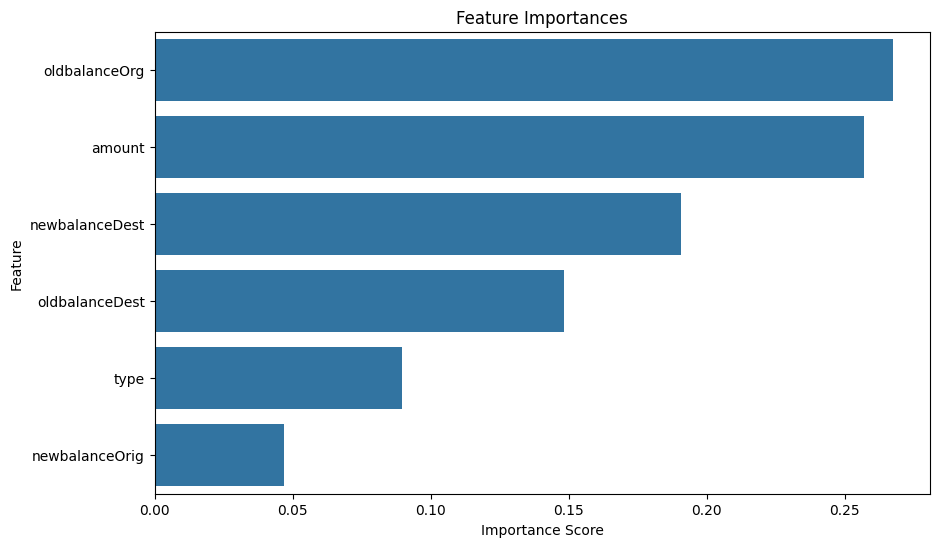

The Accuracy is: 0.9924406047516199
Confusion Matrix:
 [[2703    0]
 [  21   54]]


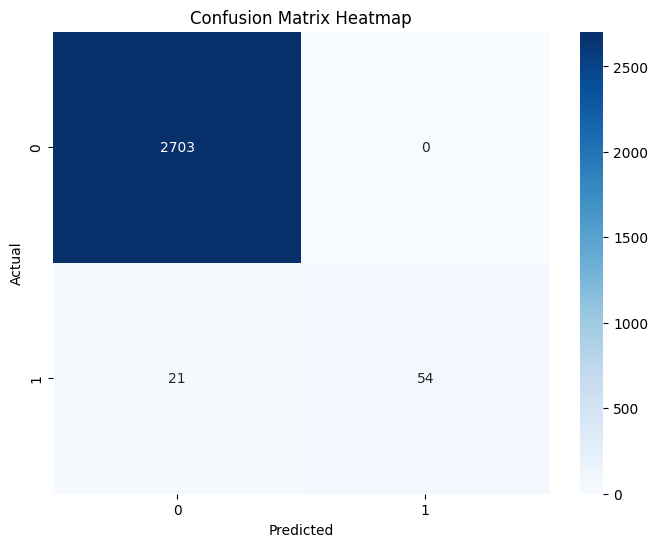

In [ ]:
## Feature importance using the RandomForest model
importances = model.feature_importances_

# Create a DataFrame to hold feature names and their importance
feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Model Predictions
ypred = model.predict(X_test)
print("The Accuracy is:", accuracy_score(ypred, y_test))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, ypred)  # Note the order of y_test and ypred
print("Confusion Matrix:\n", conf_matrix)

# Heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt


In [ ]:
# Model Predictions
ypred = model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, ypred)
precision = precision_score(y_test, ypred)
recall = recall_score(y_test, ypred)
f1 = f1_score(y_test, ypred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.99
Precision: 1.00
Recall: 0.72
F1 Score: 0.84


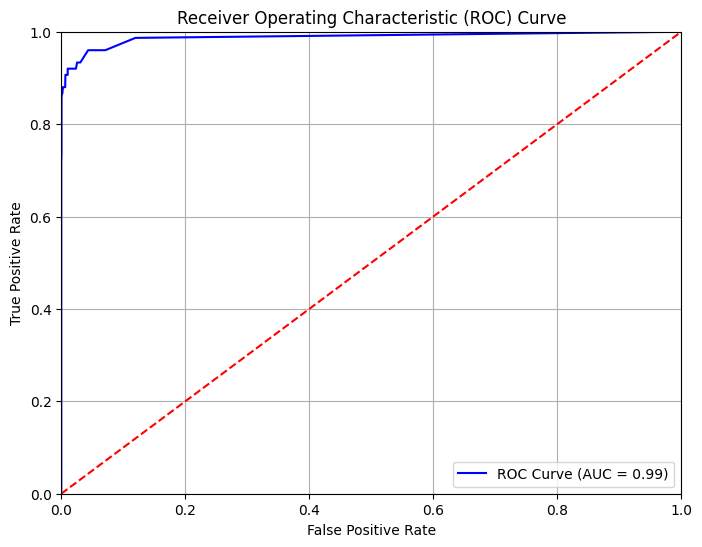

In [ ]:
# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


**Comparision with KNN** :

The Accuracy with KNN is: 0.9834413246940245


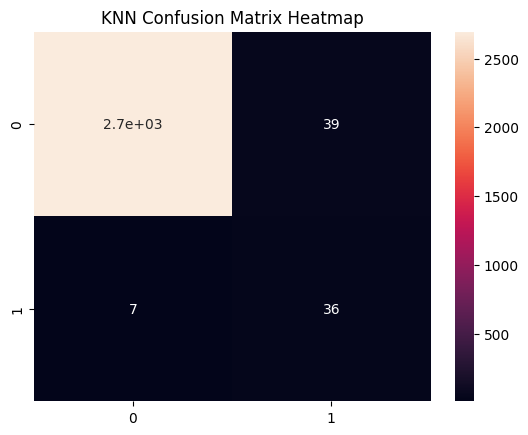

In [ ]:
##To compare RandomForest results with KNN, add the K-Nearest Neighbors model.
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors classifier
kn = KNeighborsClassifier(n_neighbors=2)
kn.fit(X_train, y_train)

# Predictions with KNN
ypred2 = kn.predict(X_test)
print("The Accuracy with KNN is:", accuracy_score(ypred2, y_test))

# Confusion Matrix for KNN
conf_matrix_knn = confusion_matrix(ypred2, y_test)
sns.heatmap(conf_matrix_knn, annot=True)
plt.title("KNN Confusion Matrix Heatmap")
plt.show()


In [ ]:
# Calculate accuracy, precision, recall, and F1 score for Random Forest
accuracy_rf = accuracy_score(y_test, ypred)
precision_rf = precision_score(y_test, ypred)
recall_rf = recall_score(y_test, ypred)
f1_rf = f1_score(y_test, ypred)

# Calculate accuracy, precision, recall, and F1 score for KNN
accuracy_knn = accuracy_score(y_test, ypred2)
precision_knn = precision_score(y_test, ypred2)
recall_knn = recall_score(y_test, ypred2)
f1_knn = f1_score(y_test, ypred2)

# Print the results for Random Forest
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}\n")

# Print the results for KNN
print("K-Nearest Neighbors Metrics:")
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1 Score: {f1_knn:.2f}")


Random Forest Metrics:
Accuracy: 0.99
Precision: 1.00
Recall: 0.72
F1 Score: 0.84

K-Nearest Neighbors Metrics:
Accuracy: 0.98
Precision: 0.84
Recall: 0.48
F1 Score: 0.61


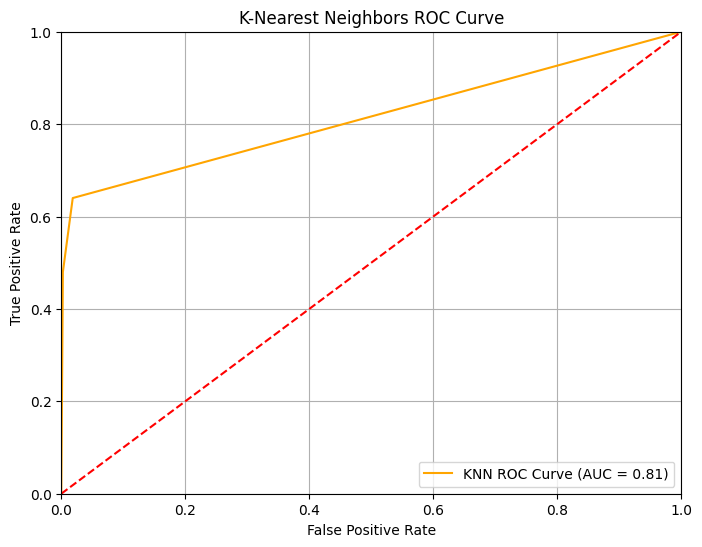

In [ ]:
# Get predicted probabilities for the positive class using KNN
y_prob_knn = kn.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve for KNN
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='orange', label=f'KNN ROC Curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Nearest Neighbors ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


**Comparision with Logistic Regression**

The Accuracy with Logistic Regression is: 0.9834413246940245


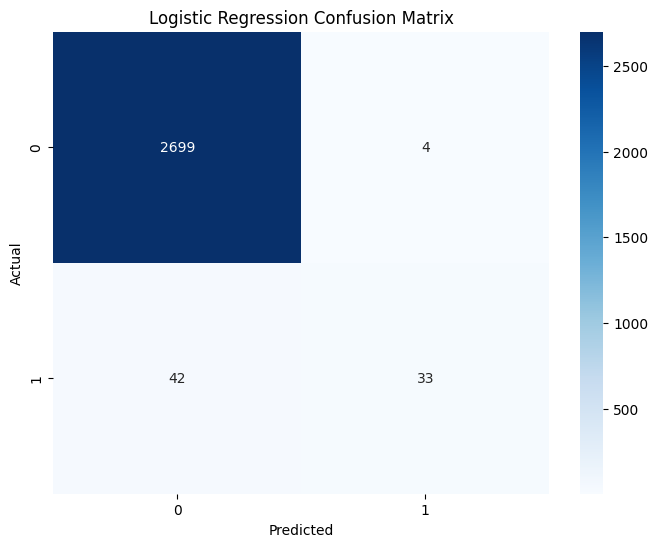

Logistic Regression Metrics:
Accuracy: 0.98
Precision: 0.89
Recall: 0.44
F1 Score: 0.59


In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)


# Predictions with Logistic Regression
ypred_lr = model_lr.predict(X_test)
print("The Accuracy with Logistic Regression is:", accuracy_score(ypred_lr, y_test))

# Confusion Matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, ypred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print Logistic Regression metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, ypred_lr):.2f}")
print(f"Precision: {precision_score(y_test, ypred_lr):.2f}")
print(f"Recall: {recall_score(y_test, ypred_lr):.2f}")
print(f"F1 Score: {f1_score(y_test, ypred_lr):.2f}")





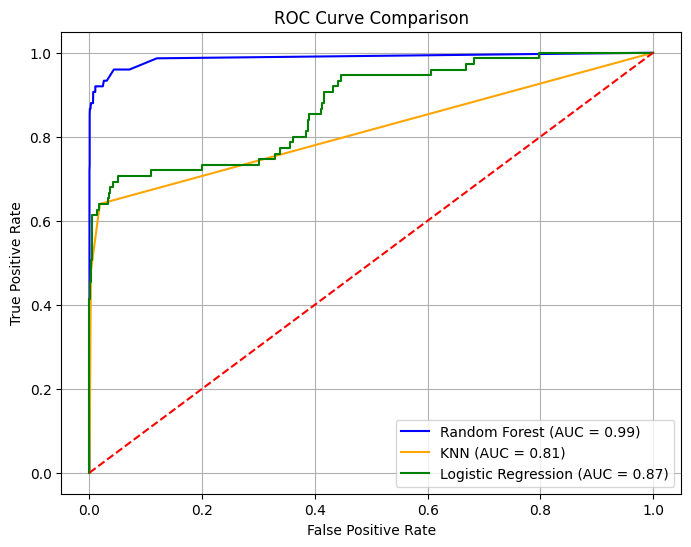

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob_rf = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)


plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_knn, tpr_knn, color='orange', label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_lr, tpr_lr, color='green', label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
ypred_rf = model.predict(X_test)
# Calculate accuracy, precision, recall, and F1 score for Random Forest
accuracy_rf = accuracy_score(y_test, ypred_rf)
precision_rf = precision_score(y_test, ypred_rf)
recall_rf = recall_score(y_test, ypred_rf)
f1_rf = f1_score(y_test, ypred_rf)

# Calculate accuracy, precision, recall, and F1 score for Logistic Regression
accuracy_lr = accuracy_score(y_test, ypred_lr)
precision_lr = precision_score(y_test, ypred_lr)
recall_lr = recall_score(y_test, ypred_lr)
f1_lr = f1_score(y_test, ypred_lr)

# Print the results for Random Forest
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}\n")

# Print the results for Logistic Regression
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr:.2f}")
print(f"Precision: {precision_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")
print(f"F1 Score: {f1_lr:.2f}")


Random Forest Metrics:
Accuracy: 0.99
Precision: 1.00
Recall: 0.72
F1 Score: 0.84

Logistic Regression Metrics:
Accuracy: 0.98
Precision: 0.89
Recall: 0.44
F1 Score: 0.59


**Comparision with Naive Bayes**

The Accuracy with Naive Bayes is: 0.9643628509719222


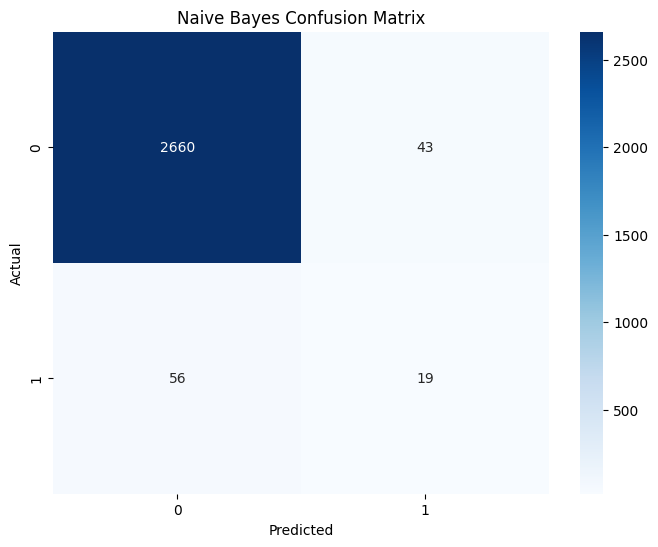

Naive Bayes Metrics:
Accuracy: 0.96
Precision: 0.31
Recall: 0.25
F1 Score: 0.28


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train the Naive Bayes model
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Predictions with Naive Bayes
ypred_nb = model_nb.predict(X_test)
print("The Accuracy with Naive Bayes is:", accuracy_score(y_test, ypred_nb))

# Confusion Matrix for Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, ypred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print Naive Bayes metrics
print("Naive Bayes Metrics:")
print(f"Accuracy: {accuracy_score(y_test, ypred_nb):.2f}")
print(f"Precision: {precision_score(y_test, ypred_nb):.2f}")
print(f"Recall: {recall_score(y_test, ypred_nb):.2f}")
print(f"F1 Score: {f1_score(y_test, ypred_nb):.2f}")


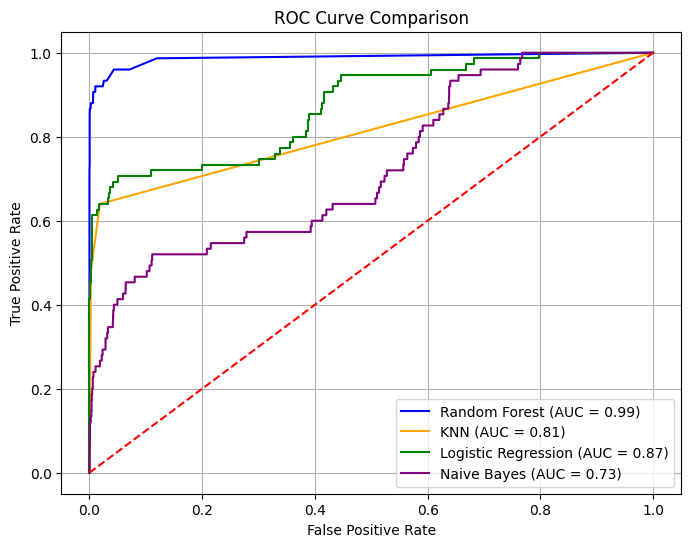

In [ ]:
# Calculate probabilities for Naive Bayes
y_prob_nb = model_nb.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_knn, tpr_knn, color='orange', label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_lr, tpr_lr, color='green', label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_nb, tpr_nb, color='purple', label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line

# Configure plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train the Naive Bayes model
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Predictions with Naive Bayes
ypred_nb = model_nb.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score for Random Forest
accuracy_rf = accuracy_score(y_test, ypred_rf)
precision_rf = precision_score(y_test, ypred_rf)
recall_rf = recall_score(y_test, ypred_rf)
f1_rf = f1_score(y_test, ypred_rf)

# Calculate accuracy, precision, recall, and F1 score for Naive Bayes
accuracy_nb = accuracy_score(y_test, ypred_nb)
precision_nb = precision_score(y_test, ypred_nb)
recall_nb = recall_score(y_test, ypred_nb)
f1_nb = f1_score(y_test, ypred_nb)

# Print the results for Random Forest
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}\n")

# Print the results for Naive Bayes
print("Naive Bayes Metrics:")
print(f"Accuracy: {accuracy_nb:.2f}")
print(f"Precision: {precision_nb:.2f}")
print(f"Recall: {recall_nb:.2f}")
print(f"F1 Score: {f1_nb:.2f}")


Random Forest Metrics:
Accuracy: 0.99
Precision: 1.00
Recall: 0.72
F1 Score: 0.84

Naive Bayes Metrics:
Accuracy: 0.96
Precision: 0.31
Recall: 0.25
F1 Score: 0.28
